# K-Means Clustering basics

## Dependency

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import accuracy_score, silhouette_score, adjusted_rand_score
from kneed import KneeLocator
from collections import Counter, OrderedDict, defaultdict

## Parameter

In [60]:
RANDOM_STATE = 42

## Make demo data

In [61]:
features, true_labels = make_blobs(
    n_samples=200,
    centers=3,
    cluster_std=2.75,
    random_state=RANDOM_STATE
)

df = pd.DataFrame(features, columns=['x', 'y'])
df['true_label'] = true_labels

In [62]:
df.head()

,x,y,true_label
0,9.770759,3.276210,1
1,-9.713497,11.274518,0
2,-6.913306,-9.347559,2
3,-10.861859,-10.750635,2
4,-8.500380,-4.543704,2


In [63]:
df.tail()

,x,y,true_label
195,-6.024631,-2.822880,2
196,2.677814,9.494375,0
197,1.833638,11.124732,0
198,3.342066,4.967784,1
199,1.959504,4.137652,1


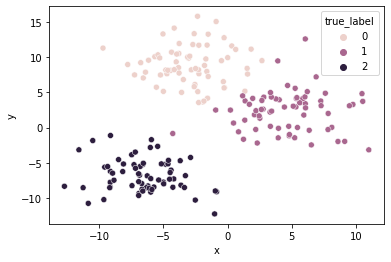

In [64]:
sns.scatterplot(
    x='x', 
    y='y', 
    hue='true_label',
    data=df
)
plt.show()

## Calculate withint-cluster variation
- Use squared Euclidean distance

In [65]:
# Number of observations in the kth cluster
c_k = Counter(df['true_label'])
c_k = OrderedDict(sorted(c_k.items()))
print(f'Number of observations in the kth cluster: {c_k}')

data = df.values.tolist()
# Number of features, -1 because the last column is response
p = len(data[0]) - 1
# List to store the within-cluster variation for each kth cluster
w_c = []

for k in c_k.keys():
    
    # Get kth cluster data
    curr_data = []
    for i in range(len(data)):
        if data[i][2] == k:
            curr_data.append(data[i])
    
    curr_w_c = 0
            
    # Get pair
    for i in range(len(curr_data)):
        for i_dash in range(len(curr_data)):
            
            # For each feature
            for j in range(p):
                
                # Get squared Euclidean distance
                squared_euclidean_distance = (curr_data[i][j] - curr_data[i_dash][j])**2
                
                # Sum of all of the pairwise squared Euclidean distances 
                # between the observations in the kth cluster
                curr_w_c += squared_euclidean_distance
                
    # Divided by the total number of observations in the kth cluster
    w_c.append(curr_w_c / c_k[k])

Number of observations in the kth cluster: OrderedDict([(0, 67), (1, 67), (2, 66)])


In [66]:
print(f'The within-cluster variation: {w_c}')

The within-cluster variation: [1812.1016679236586, 2186.1890649541365, 1514.368248958943]


## Centroid of each cluster

In [67]:
c_k = Counter(df['true_label'])
c_k = OrderedDict(sorted(c_k.items()))

data = df.values.tolist()
p = len(data[0]) - 1

centroids = defaultdict(list)

for k in c_k.keys():

    curr_data = []
    for i in range(len(data)):
        if data[i][-1] == k:
            curr_data.append(data[i])

    for j in range(p):
        curr_feature_sum = 0
        for i in range(len(curr_data)):
            curr_feature_sum += curr_data[i][j]
        centroids[k].append(curr_feature_sum / c_k[k])

In [68]:
centroids

defaultdict(list,
            {0: [-2.9206627008691735, 8.858311860139345],
             1: [4.6187132951014895, 2.3252909255115677],
             2: [-6.510485386346885, -6.801277479475444]})

In [69]:
data = []

for item in centroids.items():
    row = item[1][:]
    row.append(item[0])
    data.append(row[:])
        
df_centroid = pd.DataFrame(data, columns=['centroid_x', 'centroid_y', 'label'])
df_centroid['label_centroid'] = df_centroid['label'].astype(str) + '_centroid'

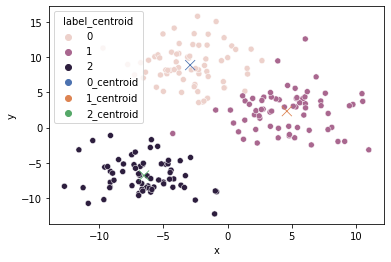

In [70]:
sns.scatterplot(
    x='x', 
    y='y', 
    hue='true_label',
    data=df
)
plt.legend(loc='upper left')

sns.scatterplot(
    x='centroid_x',
    y='centroid_y',
    hue='label_centroid',
    data=df_centroid,
    palette='deep',
    marker='x',
    s=100
)

plt.show()

## Residual sum of squares (RSS) or sum of squared error (SSE)

In [71]:
rss = 0

data = df.values.tolist()
p = len(data[0]) - 1

for i in range(len(data)):
    k = data[i][-1]
    centroids_k = centroids[k]
    
    for j in range(p):
        
        rss += (data[i][j] - centroids_k[j])**2

In [72]:
print(f'RSS: {rss:.1f}')

RSS: 2756.3


## K-mean clustering

In [73]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [74]:
kmeans = KMeans(
    init='random',
    n_clusters=3,
    n_init=10,
    max_iter=100,
    random_state=RANDOM_STATE
)

In [75]:
kmeans.fit(scaled_features)

KMeans(init='random', max_iter=100, n_clusters=3, random_state=42)

In [76]:
print(f'Lowest sum of squared error: {kmeans.inertia_:.1f}')
print('Final locations of the centroids')
print(kmeans.cluster_centers_)
print(f'Number of iterations spent to converge: {kmeans.n_iter_}')

Lowest sum of squared error: 74.6
Final locations of the centroids
[[-0.25813925  1.05589975]
 [-0.91941183 -1.18551732]
 [ 1.19539276  0.13158148]]
Number of iterations spent to converge: 2


In [77]:
df['pred_label'] = kmeans.labels_

In [78]:
df.head()

,x,y,true_label,pred_label
0,9.770759,3.276210,1,2
1,-9.713497,11.274518,0,0
2,-6.913306,-9.347559,2,1
3,-10.861859,-10.750635,2,1
4,-8.500380,-4.543704,2,1


In [79]:
df.tail()

,x,y,true_label,pred_label
195,-6.024631,-2.822880,2,1
196,2.677814,9.494375,0,0
197,1.833638,11.124732,0,0
198,3.342066,4.967784,1,2
199,1.959504,4.137652,1,2


In [80]:
score = accuracy_score(df['true_label'], df['pred_label'])
print(f'Subset accuracy: {score:.1%}')

Subset accuracy: 33.5%


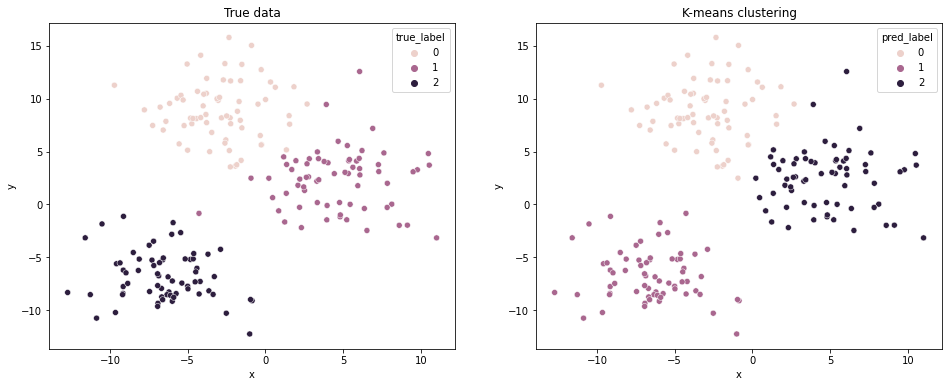

In [81]:
plt.figure(figsize=(8 * 2, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(
    x='x', 
    y='y', 
    hue='true_label',
    data=df
)
plt.title('True data')

plt.subplot(1, 2, 2)
sns.scatterplot(
    x='x', 
    y='y', 
    hue='pred_label',
    data=df
)
plt.title('K-means clustering')

plt.show()

## Elbow method to choose number of clusters

In [82]:
kmeans_kwargs = {
    'init': 'random',
    'n_init': 10,
    'max_iter': 300,
    'random_state': 42
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

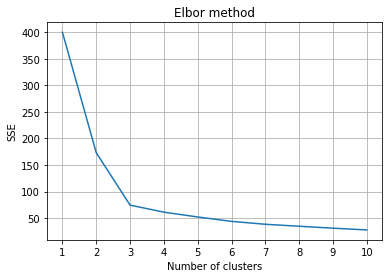

In [83]:
plt.plot(range(1, 11), sse)
plt.title('Elbor method')
plt.xticks(range(1, 11))
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.grid()
plt.show()

In [84]:
kl = KneeLocator(range(1, 11), sse, curve='convex', direction='decreasing')
print(kl.elbow)

3


## Silhouette coefficient

In [85]:
silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    # kmeans.labels_ is a list of labels assigned by k-means clustering
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

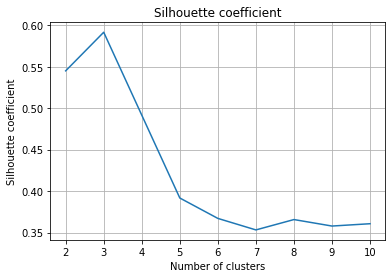

In [86]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.title('Silhouette coefficient')
plt.xticks(range(2, 11))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette coefficient')
plt.grid()
plt.show()

## Nonspherical clusters

In [87]:
features, true_labels = make_moons(
    n_samples=250,
    noise=0.05,
    random_state=RANDOM_STATE
)

print(features.shape)
print(true_labels.shape)

df_moon = pd.DataFrame(features, columns=['x', 'y'])
df_moon['true_label'] = true_labels

(250, 2)
(250,)


In [88]:
df_moon.head()

,x,y,true_label
0,0.084154,0.113341,1
1,1.050915,0.154710,0
2,-0.716555,0.675608,0
3,0.060932,0.926542,0
4,-1.005525,0.336425,0


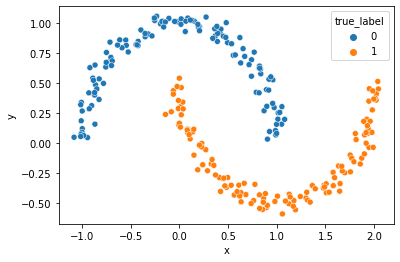

In [89]:
sns.scatterplot(
    x='x', 
    y='y', 
    hue='true_label',
    data=df_moon
)
plt.show()

## DBSCAN

In [90]:
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.3)

kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

kmeans_silhouette = silhouette_score(scaled_features, kmeans.labels_)
dbscan_silhouette = silhouette_score(scaled_features, dbscan.labels_)

print(f'Silhouette scores, kmeans: {kmeans_silhouette:.2f}, DBSCAN: {dbscan_silhouette:.2f}')
print('This result is misleading')

Silhouette scores, kmeans: 0.50, DBSCAN: 0.38
This result is misleading


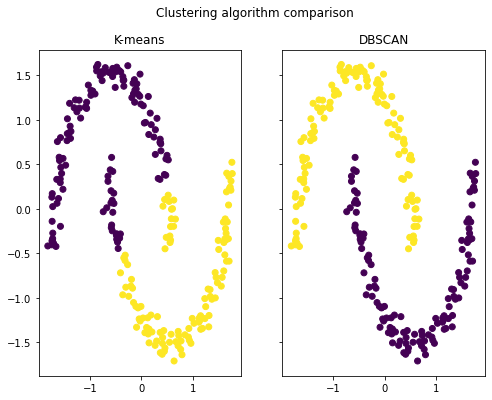

In [91]:
fig, (ax1, ax2) = plt.subplots(
    1, 
    2,
    figsize=(8, 6),
    sharex=True,
    sharey=True
)

fig.suptitle('Clustering algorithm comparison')

# K-means
ax1.scatter(scaled_features[:, 0], scaled_features[:, 1], c=kmeans.labels_)
ax1.set_title('K-means')

# DBSCAN
ax2.scatter(scaled_features[:, 0], scaled_features[:, 1], c=dbscan.labels_)
ax2.set_title('DBSCAN')

plt.show()

## Adjusted rand index (ARI)

In [92]:
ari_kmeans = adjusted_rand_score(true_labels, kmeans.labels_)
ari_dbscan = adjusted_rand_score(true_labels, dbscan.labels_)

print(f'ARI, K-means: {ari_kmeans:.2f}, DBSCAN: {ari_dbscan:.2f}')

ARI, K-means: 0.47, DBSCAN: 1.00


## Resource
- [K-Means Clustering in Python: A Practical Guide](https://realpython.com/k-means-clustering-python/)
- [In Depth: k-Means Clustering](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html)